In [64]:
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

samplerate, data = wavfile.read('inputaudio.wav')
# samplerate 是取樣率
# data 是音訊

In [72]:
duration = len(data)/samplerate
# 利用資料的長度除以取樣率會是整個音訊的長度，單位 秒。
time = np.arange(0,duration,1/samplerate)
# 用 np 建立個 0 ~ duration 時間的資料，資料之間的間隔為 1/samplerate

print(samplerate)

83600
16000


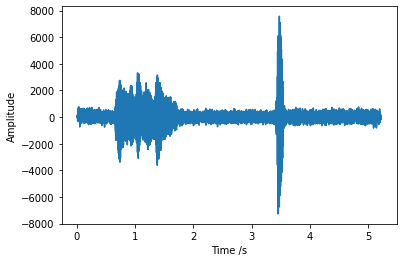

In [66]:
plt.figure() # pyplot
plt.plot(time, data) # 開畫
plt.xlabel("Time /s")
plt.ylabel("Amplitude")

# plt.xlim(3.4,3.5)
# 限制 x 軸的顯示範圍

plt.show()

(201,)
(280,)


C:\Users\USER\AppData\Local\Temp/ipykernel_9812/1666566858.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=20, shading='flat')


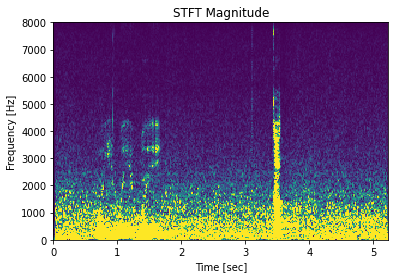

In [71]:
f, t, Zxx = signal.stft(data, samplerate, nperseg=400, noverlap=100)
# 進行 stft 轉換， nperseg 是音窗的長度，noverlap 是音窗之間重疊的長度，單位"應該"是資料量。
# 這邊是重疊 1/2，

print(f.shape)
print(t.shape)

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=20, shading='flat')
# 劃出圖片，其中 vmin 和 vmax 就是資料的上限和下限，如果超過的話整片黃的或藍的，像下面一樣
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(0,1) # 限制x軸輸出範圍。
# plt.ylim(3000,4000) # 限制y軸輸出範圍。
plt.show()

62000 6.25e-05


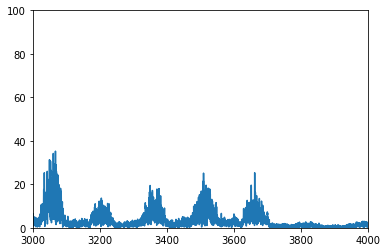

In [63]:
y = fft(data)
x = fftfreq(len(data),1/samplerate)[:(len(data)//2)]
print(len(data),1/samplerate)
plt.plot(x,2/len(data) * np.abs(y[0:len(data)//2]))
plt.xlim(3000,4000)
plt.ylim(0,100)
plt.show()